In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [4]:
toyota=pd.read_csv('ToyotaCorolla - MLR.csv')
toyota

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
toyota.info() #HERE WE CAN SEE DATA TYPES AND NO OF ENTRIES ARE CORRECT

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [6]:
toyota.drop('Cylinders',axis=1,inplace=True)
toyota

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [7]:
toyota.rename({'Age_08_04':'Age','cc':'CC'},axis=1,inplace=True)
toyota

,Price,Age,KM,Fuel_Type,HP,Automatic,CC,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [8]:
toyota=pd.get_dummies(toyota,columns=['Fuel_Type'],dtype=int)
toyota

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [9]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Price             1436 non-null   int64
 1   Age               1436 non-null   int64
 2   KM                1436 non-null   int64
 3   HP                1436 non-null   int64
 4   Automatic         1436 non-null   int64
 5   CC                1436 non-null   int64
 6   Doors             1436 non-null   int64
 7   Gears             1436 non-null   int64
 8   Weight            1436 non-null   int64
 9   Fuel_Type_CNG     1436 non-null   int64
 10  Fuel_Type_Diesel  1436 non-null   int64
 11  Fuel_Type_Petrol  1436 non-null   int64
dtypes: int64(12)
memory usage: 134.8 KB


In [10]:
toyota.isnull().sum()  # AS THERE ARE NO NULL VALUES

Price               0
Age                 0
KM                  0
HP                  0
Automatic           0
CC                  0
Doors               0
Gears               0
Weight              0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [11]:
toyota.describe() #STATISTIC SUMMARIES OF THE DATA

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,5.026462,1072.45961,0.011838,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.188510,52.64112,0.108196,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,3.000000,1000.00000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,5.000000,1040.00000,0.000000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,5.000000,1070.00000,0.000000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,5.000000,1085.00000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,6.000000,1615.00000,1.000000,1.000000,1.000000


In [91]:
toyota.corr()

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198,-0.039536,0.054084,-0.038516
Age,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253,0.002389,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598,0.144016,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614,0.062109,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249,0.001486,-0.084490,0.080249
CC,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637,0.005941,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618,0.009680,0.025495,-0.027589
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613,-0.049537,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000,0.052756,0.568087,-0.560470
Fuel_Type_CNG,-0.039536,0.002389,0.144016,0.062109,0.001486,0.005941,0.009680,-0.049537,0.052756,1.000000,-0.038074,-0.296717


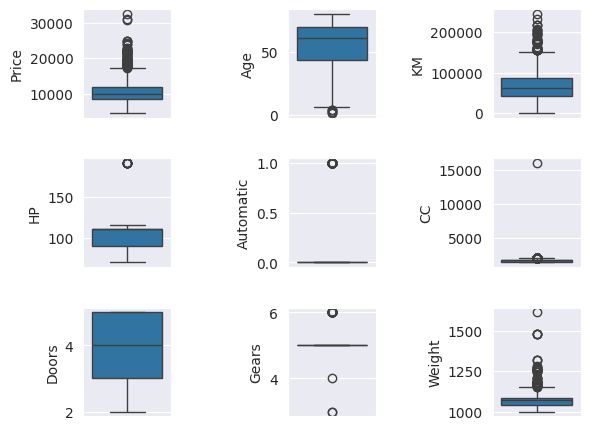

In [102]:
fig, ax = plt.subplots(3,3)

sns.boxplot(toyota['Price'], ax = ax[0,0])         #HERE WE CAN SEE OUTLIERS BUT WE WILL NOT REMOVE THEM NOW, WHUCH MAY LEAD TO LOSE OF DATA
sns.boxplot(toyota['Age'], ax = ax[0,1])           #SO, WE WILL CONTINUE WITH THE MODEL AND THEN SEE WHICH TECHNIQUES ARE BETTER TO REMOVE OUTIERS
sns.boxplot(toyota['KM'], ax = ax[0,2])
sns.boxplot(toyota['HP'], ax = ax[1,0])
sns.boxplot(toyota['Automatic'], ax = ax[1,1])
sns.boxplot(toyota['CC'], ax = ax[1,2])
sns.boxplot(toyota['Doors'], ax = ax[2,0])
sns.boxplot(toyota['Gears'], ax = ax[2,1])
sns.boxplot(toyota['Weight'], ax = ax[2,2])
plt.tight_layout(pad=2.50)


Outliers calculation for Price
Axes(0.125,0.11;0.775x0.77)
count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64
count     1436.000000
mean     10730.824513
std       3626.964585
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64
Quartile 1 :  8450.0
Quartile 3 :  11950.0
Inter-Quartile Range :  3500.0
Upper Limit :  17200.0
Lower Limit :  3200.0
     Price  Age     KM   HP  Automatic    CC  Doors  Gears  Weight  \
7    18600   30  75889   90          0  2000      3      5    1245   
8    21500   27  19700  192          0  1800      3      5    1185   
10   20950   25  31461  192          0  1800      3      6    1185   
11   19950   22  43610  192          0  1800      3      6    1185   
12   19600   25  32189  192          0  1800      3      6    11

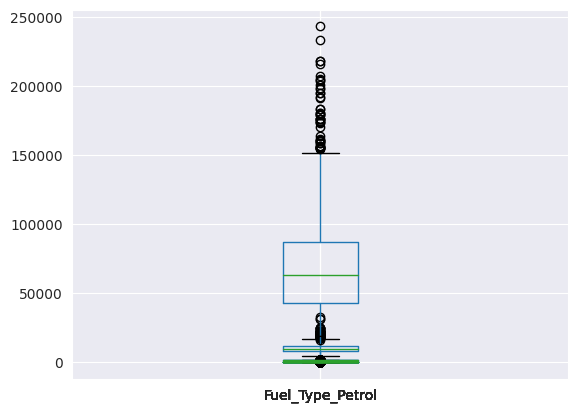

In [107]:
#Outlier Detection for all columns
Num_Columns= ['Price','Age','KM','HP','Automatic','CC','Doors','Gears','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol']
for i in Num_Columns:
  column_name = i
  print("Outliers calculation for", i)
  print(toyota.boxplot(column=[column_name],grid=True))
  print(toyota[column_name].describe())
#Quartile 1
  print(toyota[column_name].describe())
  Q1=toyota[column_name].quantile(0.25)
  print('Quartile 1 : ',Q1)
#Quartile 3
  Q3=toyota[column_name].quantile(0.75)
  print('Quartile 3 : ',Q3)
#Interquartile Range
  IQR= Q3 - Q1
  print('Inter-Quartile Range : ',IQR)
#Upper Limit
  UL = Q3 + (1.5 * IQR)
  print('Upper Limit : ',UL)
#Lower Limit
  LL = Q1 - (1.5 * IQR)
  print('Lower Limit : ', LL)
  Outliers=toyota[(toyota[column_name] > UL) | (toyota[column_name] < LL)]
  print(Outliers)
  print('__________________________________________________________')

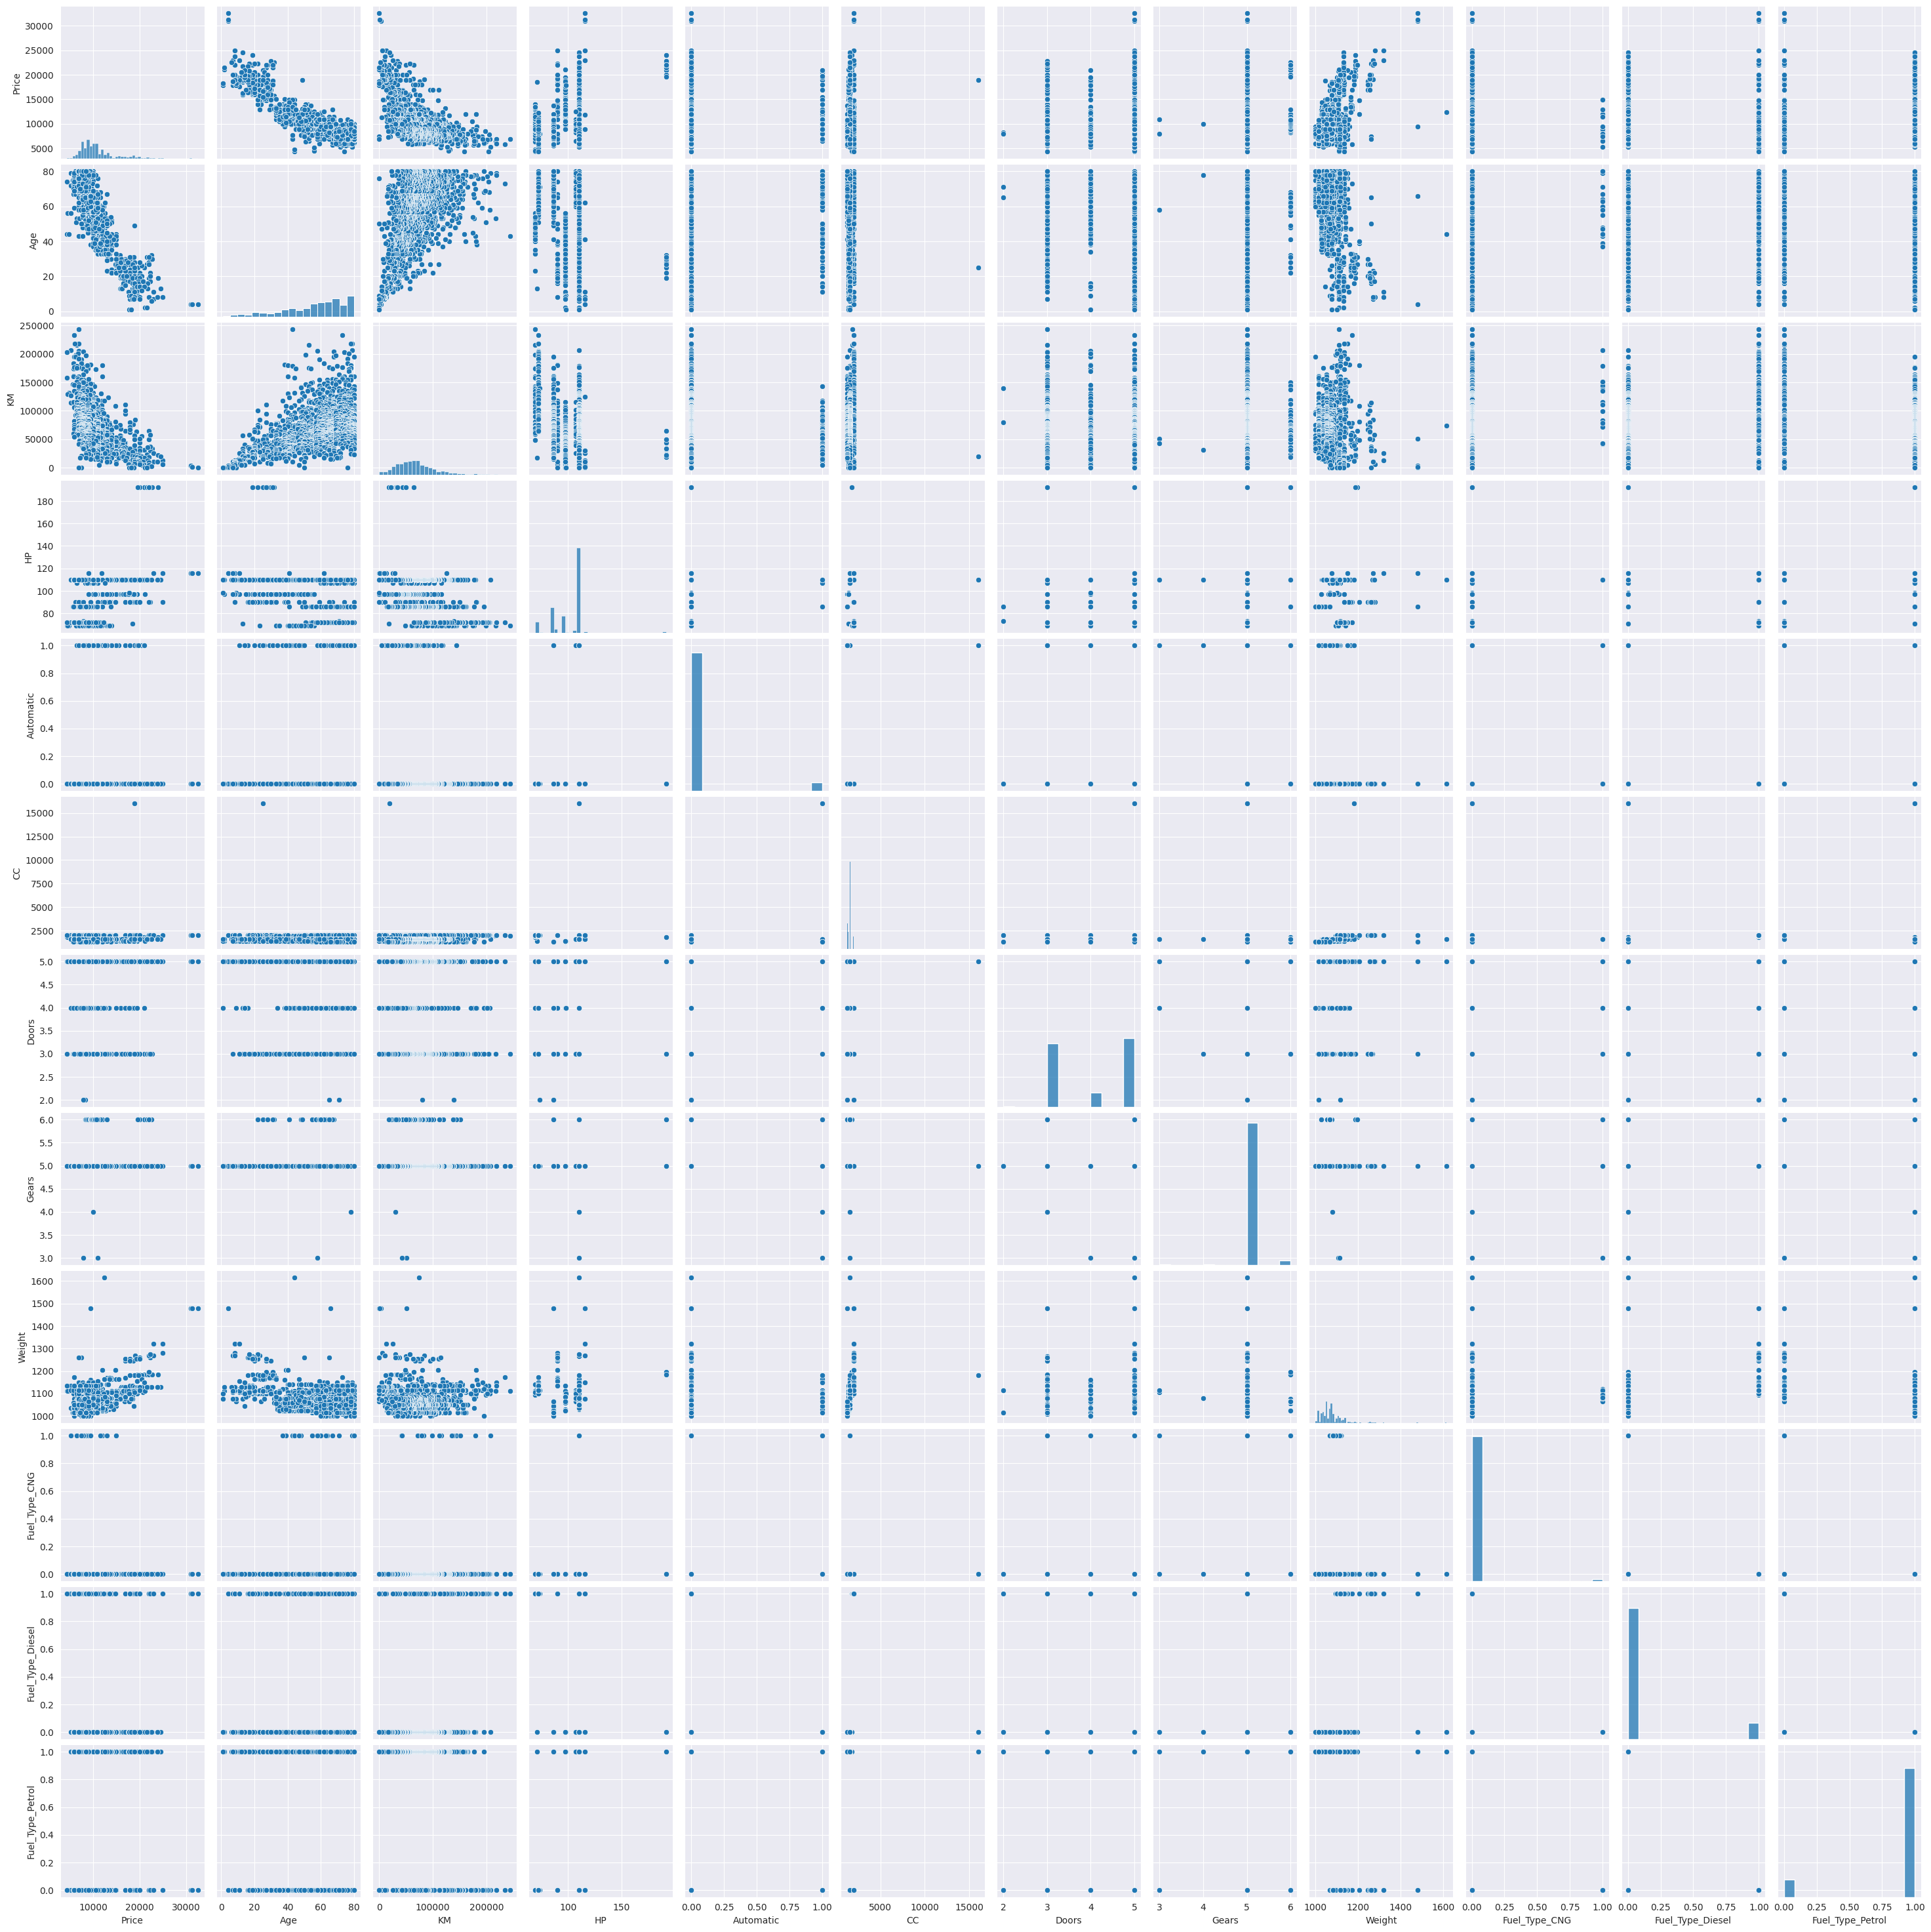

In [92]:
#FORMAT THE PLOT BACKGROUND & SCATTER PLOT FOR ALL VARIABLES
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

In [113]:
#BUILD MODEL
model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     912.3
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:47:58   Log-Likelihood:                -12369.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1425   BIC:                         2.482e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6971.2342   1143.563     -6.096      0.000   -9214.482   -4727.986
Age               -123.7771      2.631    -47.043      0.000    -128.938    -118.616
KM                  -0.0175      0.001    -13.154      0.000      -0.020      -0.015
HP                  23.5270      3.575      6.581      0.000      16.515      30.539
Automatic          300.2592    161.026      1.865      0.062     -15.614     616.133
CC                  -0.0556      0.092     -0.604      0.546      -0.236       0.125
Doors              -30.3567     40.908     -0.742      0.458    -110.603      49.890
Gears              622.7990    198.026      3.145      0.002     234.346    1011.252
Weight              20.8174      1.218     17.090      0.000      18.428      23.207
Fuel_Type_CNG    -2889.7950    433.361     -6.668      0.000   -3739.890   -2039.700
Fuel_Type_Diesel -2335.7407    477.248     -4.894      0.000   -3271.924   -1399.557
Fuel_Type_Petrol -1745.6984    354.774     -4.921      0.000   -2441.634   -1049.763
==============================================================================
Omnibus:                      265.277   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2773.279
Skew:                          -0.532   Prob(JB):                         0.00
Kurtosis:                       9.724   Cond. No.                     4.74e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.91e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [112]:
#BETA COEFFICIENTS
model.params

Intercept          -6971.234151
Age                 -123.777069
KM                    -0.017523
HP                    23.526963
Automatic            300.259212
CC                    -0.055629
Doors                -30.356710
Gears                622.798964
Weight                20.817390
Fuel_Type_CNG      -2889.795047
Fuel_Type_Diesel   -2335.740703
Fuel_Type_Petrol   -1745.698402
dtype: float64

In [124]:
#PREDICTED VALUES FOR PRICE
toyota['predicted_model']=model.fittedvalues
toyota['predicted_model']

0       16304.152422
1       15849.403232
2       16272.811172
3       15915.052508
4       15690.503276
            ...     
1431     8694.200430
1432     8141.751414
1433     8300.294866
1434     8425.824273
1435    10527.736468
Name: predicted_model, Length: 1436, dtype: float64

In [125]:
#RESIDUAL ERROR
toyota['error_model']=model.resid
toyota['error_model']

0      -2804.152422
1      -2099.403232
2      -2322.811172
3       -965.052508
4      -1940.503276
           ...     
1431   -1194.200430
1432    2703.248586
1433     199.705134
1434   -1175.824273
1435   -3577.736468
Name: error_model, Length: 1436, dtype: float64

In [126]:
#squared error
toyota['Error_Squared']=toyota['error_model']**2
toyota

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,error_model,Error_Squared,predicted_model
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0,-2804.152422,7.863271e+06,16304.152422
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0,-2099.403232,4.407494e+06,15849.403232
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0,-2322.811172,5.395452e+06,16272.811172
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0,-965.052508,9.313263e+05,15915.052508
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0,-1940.503276,3.765553e+06,15690.503276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1,-1194.200430,1.426115e+06,8694.200430
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1,2703.248586,7.307553e+06,8141.751414
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1,199.705134,3.988214e+04,8300.294866
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1,-1175.824273,1.382563e+06,8425.824273


In [128]:
mean_squared_error=toyota['Error_Squared'].mean()
mean_squared_error

1775875.467897609

In [131]:
print(model.pvalues)

Intercept            1.397126e-09
Age                 2.563202e-292
KM                   2.205339e-37
HP                   6.531756e-11
Automatic            6.243429e-02
CC                   5.457514e-01
Doors                4.581674e-01
Gears                1.694943e-03
Weight               1.041115e-59
Fuel_Type_CNG        3.690245e-11
Fuel_Type_Diesel     1.099410e-06
Fuel_Type_Petrol     9.631372e-07
dtype: float64


In [134]:
#R squared values                  # R-squared adjust=here all the variables impact on model
(model.rsquared,model.rsquared_adj)

(0.8649083778053923, 0.8639603664215705)

# **VIF(VARIANCE INFLATION FACTOR)**

In [136]:
rsq_age = smf.ols('Age~KM+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+Automatic+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_automatic = smf.ols('Automatic~Age+KM+HP+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_automatic = 1/(1-rsq_automatic)

rsq_cc = smf.ols('CC~Age+KM+HP+Automatic+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~Age+KM+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~Age+KM+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_weight = smf.ols('Weight~Age+KM+HP+Automatic+CC+Doors+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_weight = 1/(1-rsq_weight)

rsq_Fuel_Type_CNG = smf.ols('Fuel_Type_CNG~Age+KM+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_Fuel_Type_CNG = 1/(1-rsq_Fuel_Type_CNG)

rsq_Fuel_Type_Diesel = smf.ols('Fuel_Type_Diesel~Age+KM+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_Fuel_Type_Diesel = 1/(1-rsq_Fuel_Type_Diesel)

rsq_Fuel_Type_Petrol = smf.ols('Fuel_Type_Petrol~Age+KM+HP+Automatic+CC+Doors+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol',data=toyota).fit().rsquared
vif_Fuel_Type_Petrol = 1/(1-rsq_Fuel_Type_Petrol)

# Storing vif values in a data frame
d1 = {'Variables':['Age','KM','HP','Automatic','CC','Doors','Gears','Weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'],'VIF':[vif_age,vif_km,vif_automatic,vif_hp,vif_cc,vif_doors,vif_gears,vif_weight,vif_Fuel_Type_CNG,vif_Fuel_Type_Diesel,vif_Fuel_Type_Petrol]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.920520
1,KM,2.001790
2,HP,1.094550
3,Automatic,2.299766
4,CC,1.223892
5,Doors,inf
6,Gears,inf
7,Weight,3.297145
8,Fuel_Type_CNG,inf
9,Fuel_Type_Diesel,inf


# **RESIDUAL ANALYSIS**

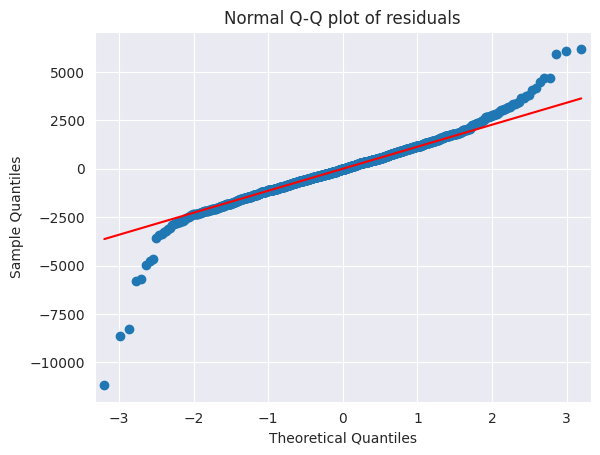

In [137]:
#TEST FOR NOMALITY OF RESIDUALS Q-Q PLOT
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

<Axes: >

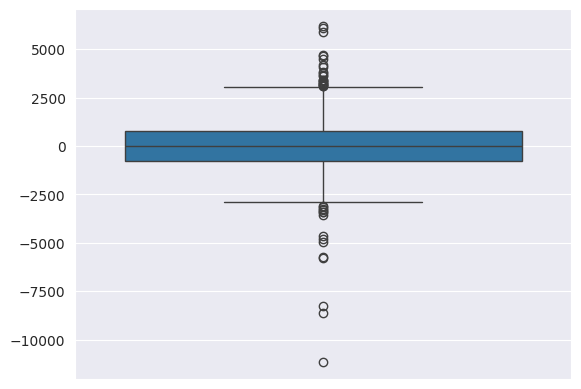

In [138]:
sns.boxplot(model.resid)

<Axes: xlabel='error_model', ylabel='Count'>

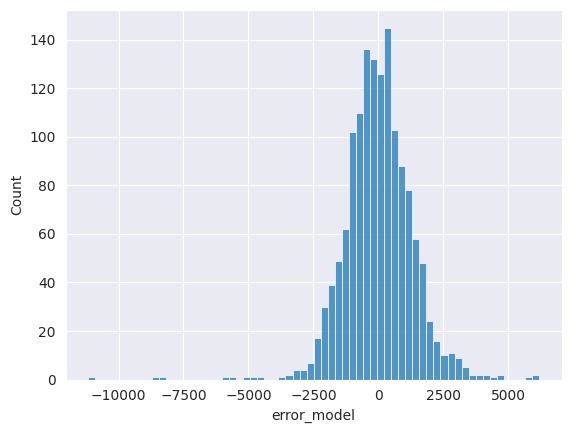

In [139]:
sns.histplot(toyota["error_model"])

<Axes: xlabel='error_model', ylabel='Density'>

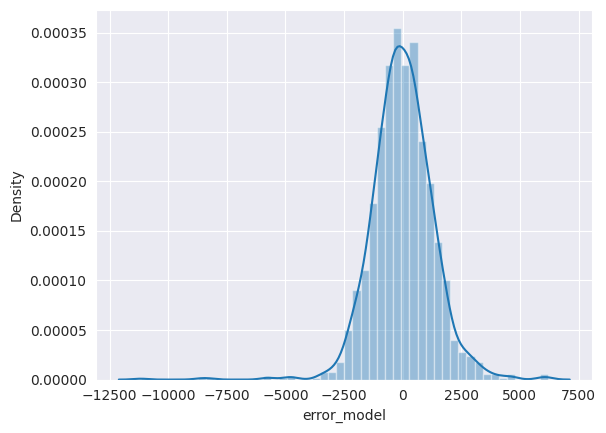

In [140]:
sns.distplot(toyota['error_model'])

# **Residual Plot for Homoscedasticity**

In [141]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

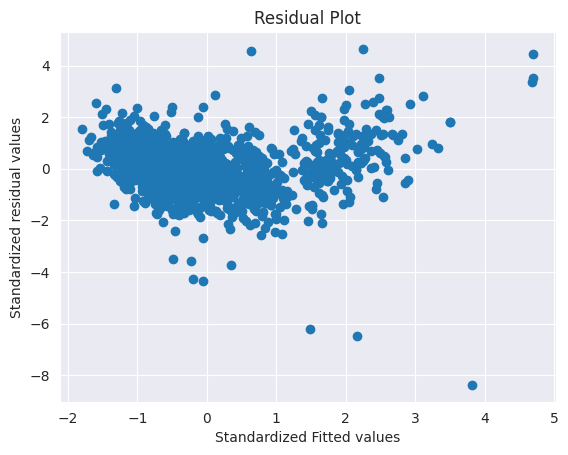

In [142]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [143]:
get_standardized_values(model.resid).mean()

-1.4844207571589838e-17

# **To test for Errors or Residual and Regressor**

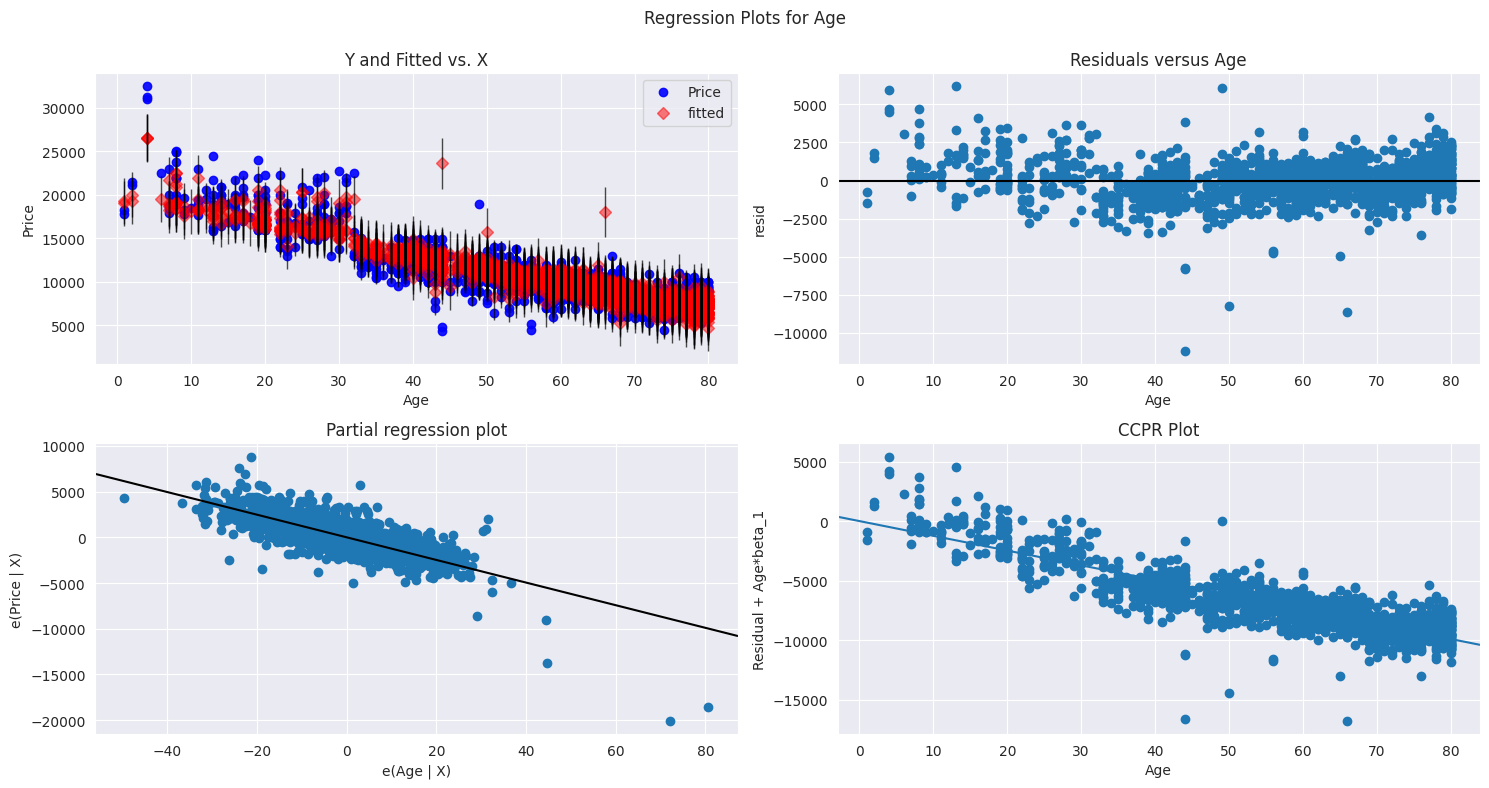

In [144]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

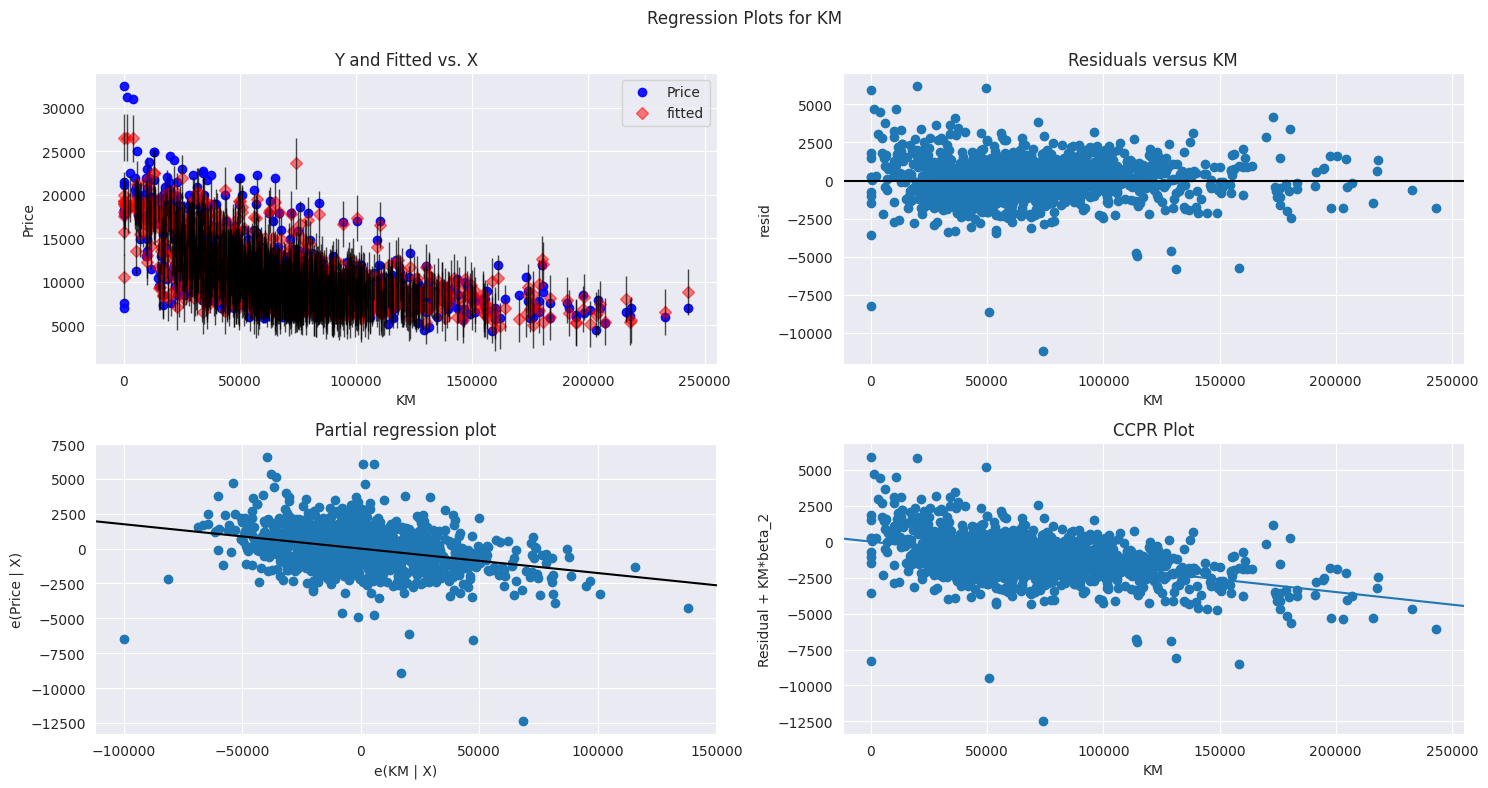

In [145]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

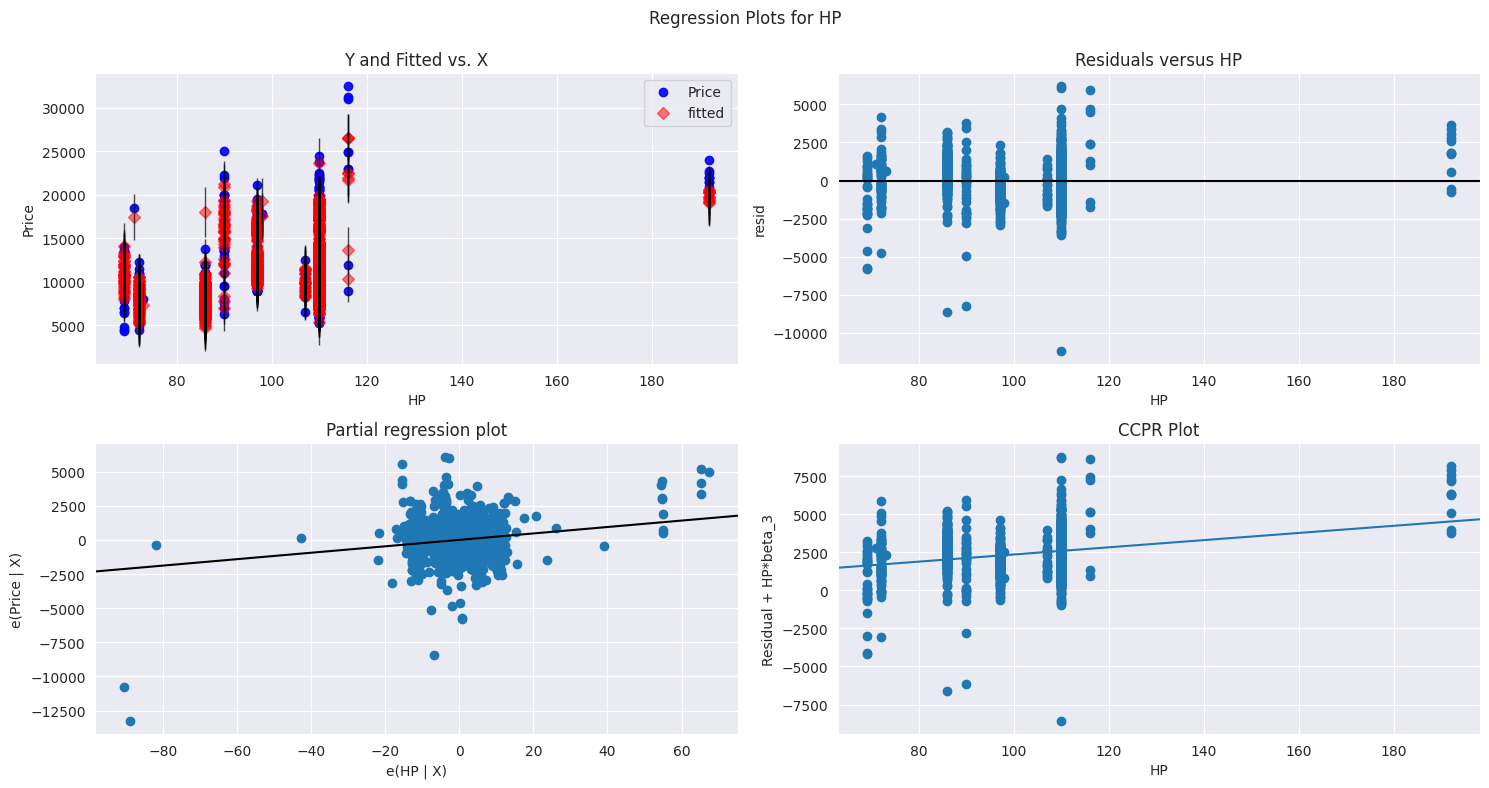

In [146]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

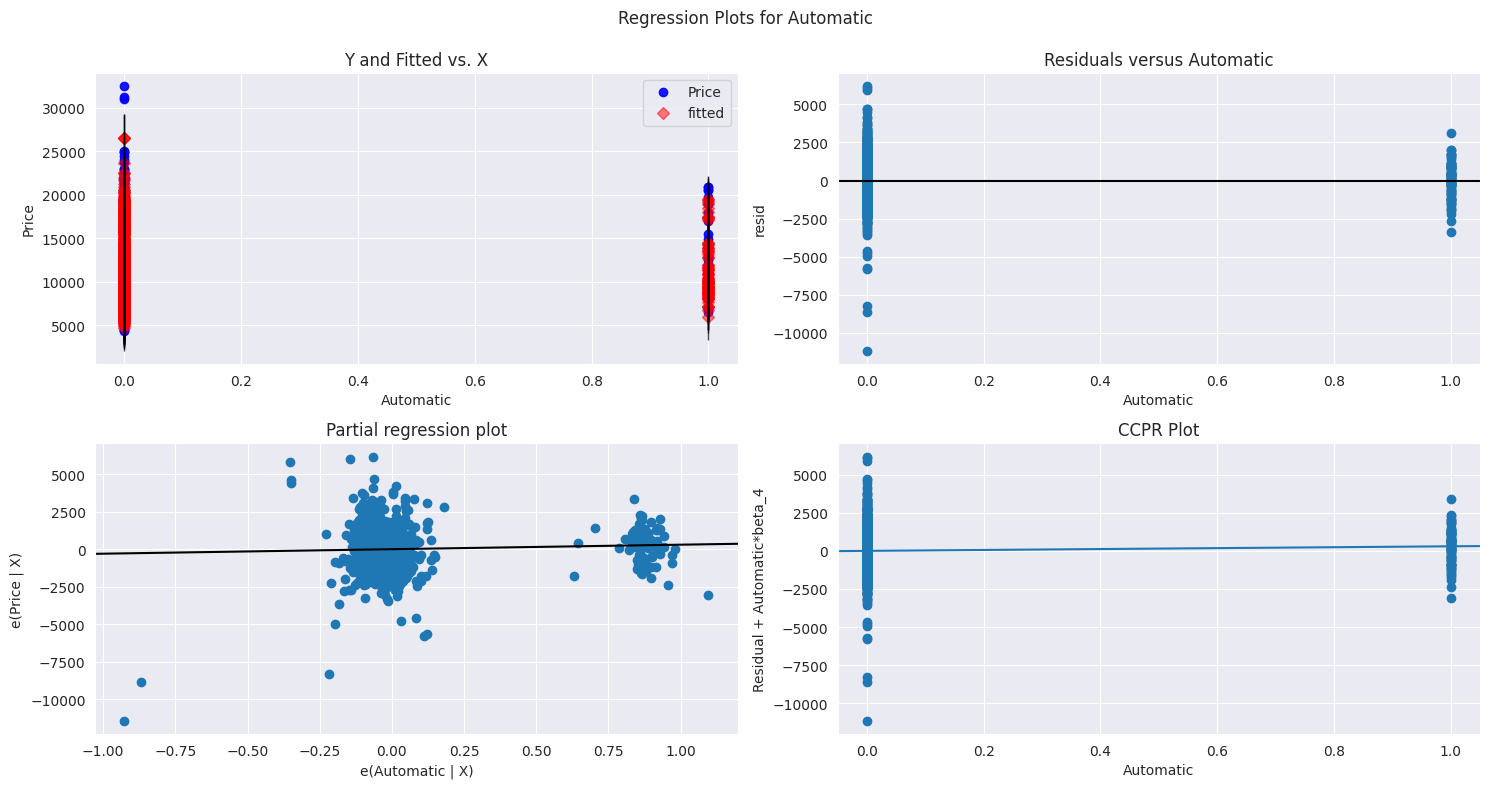

In [147]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Automatic',fig=fig)
plt.show()

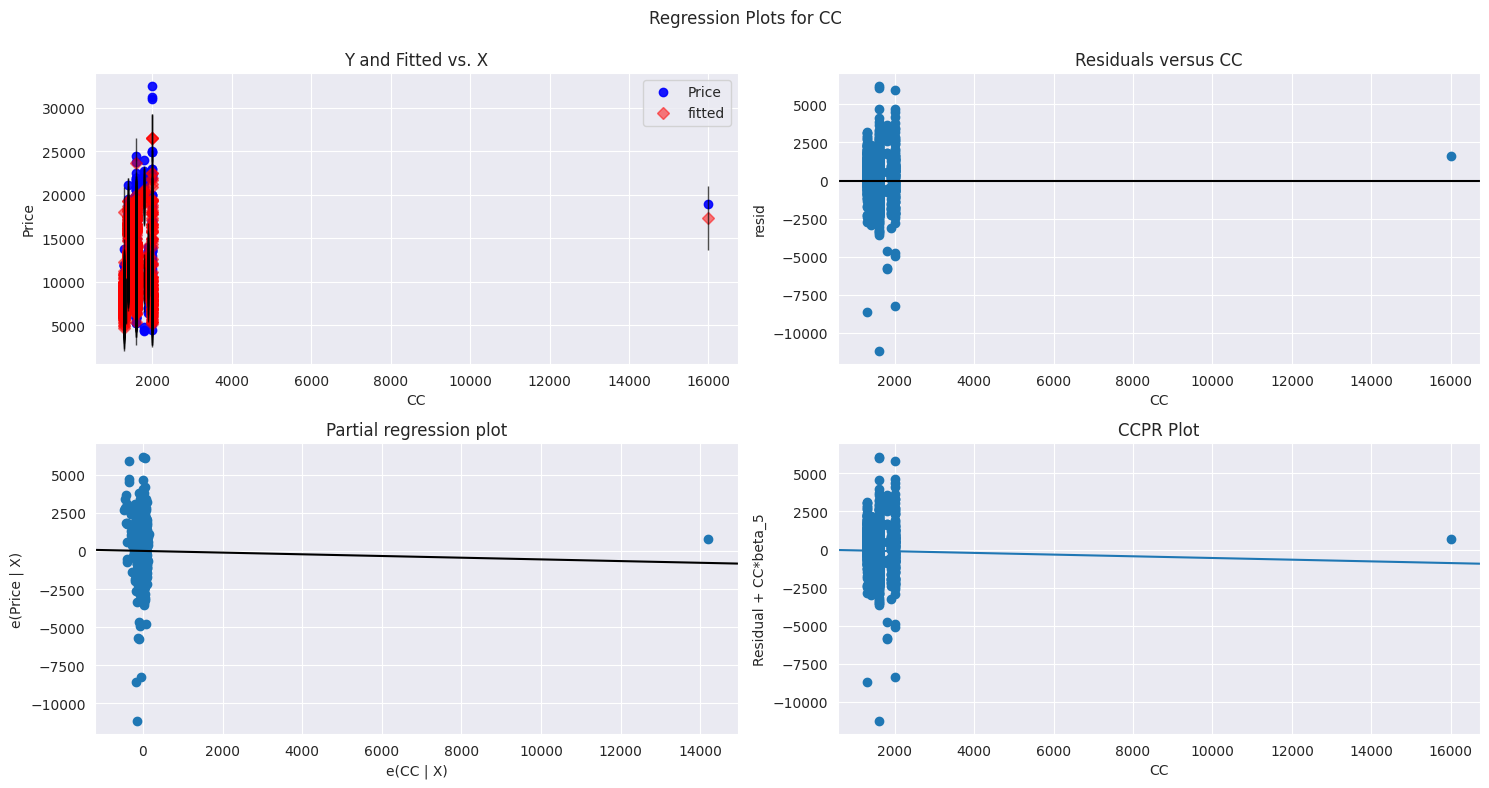

In [148]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

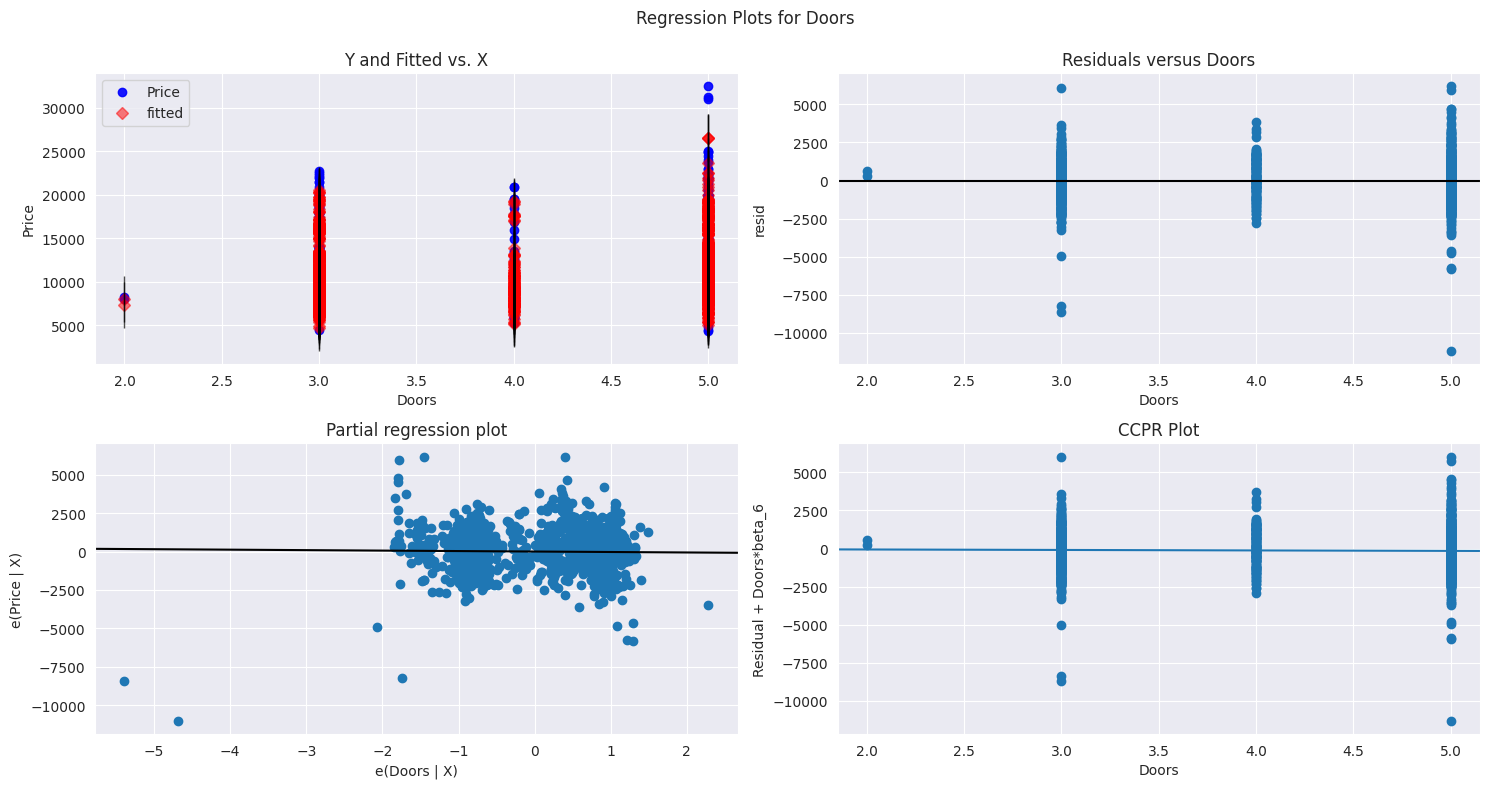

In [149]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

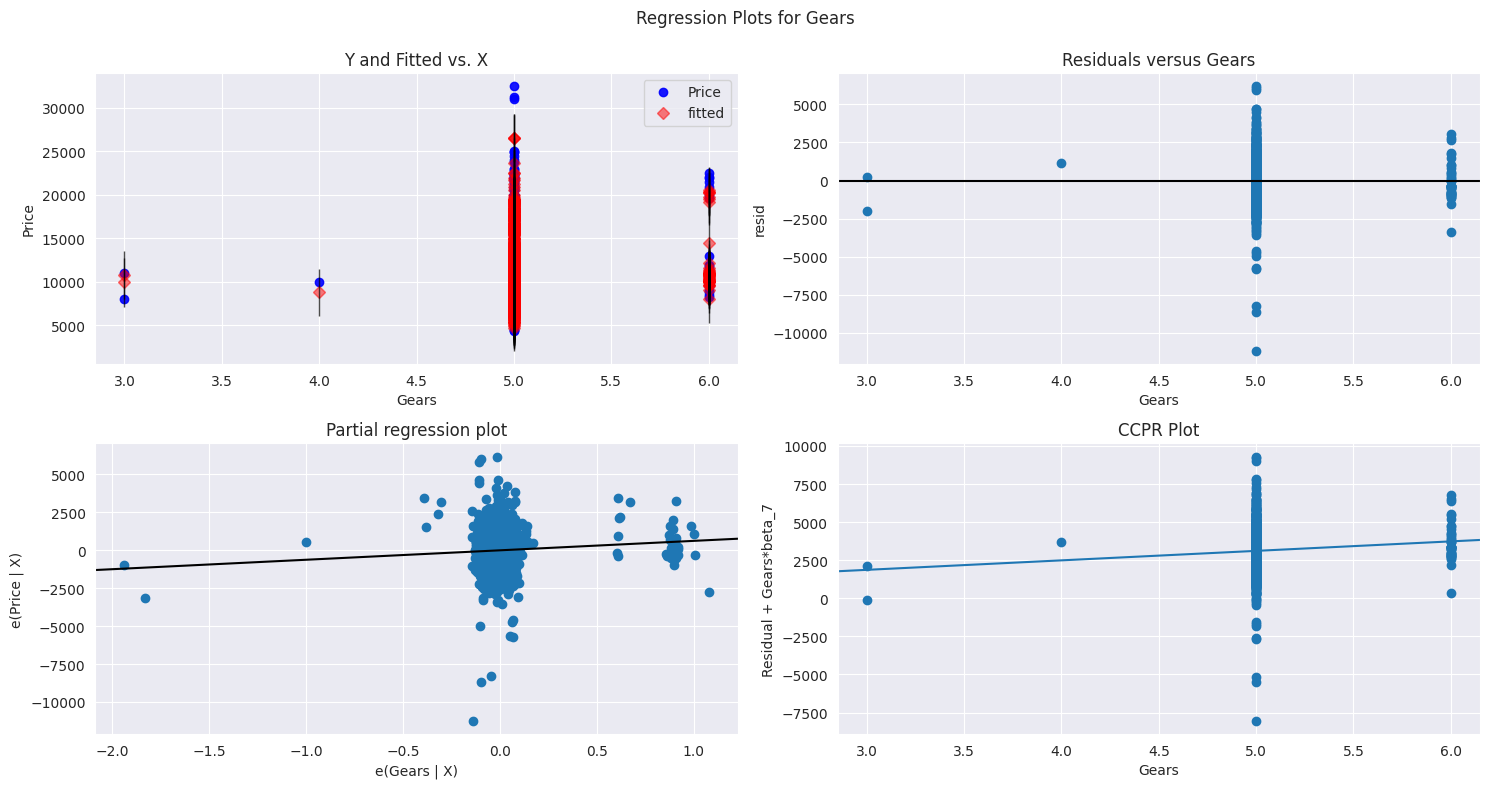

In [150]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

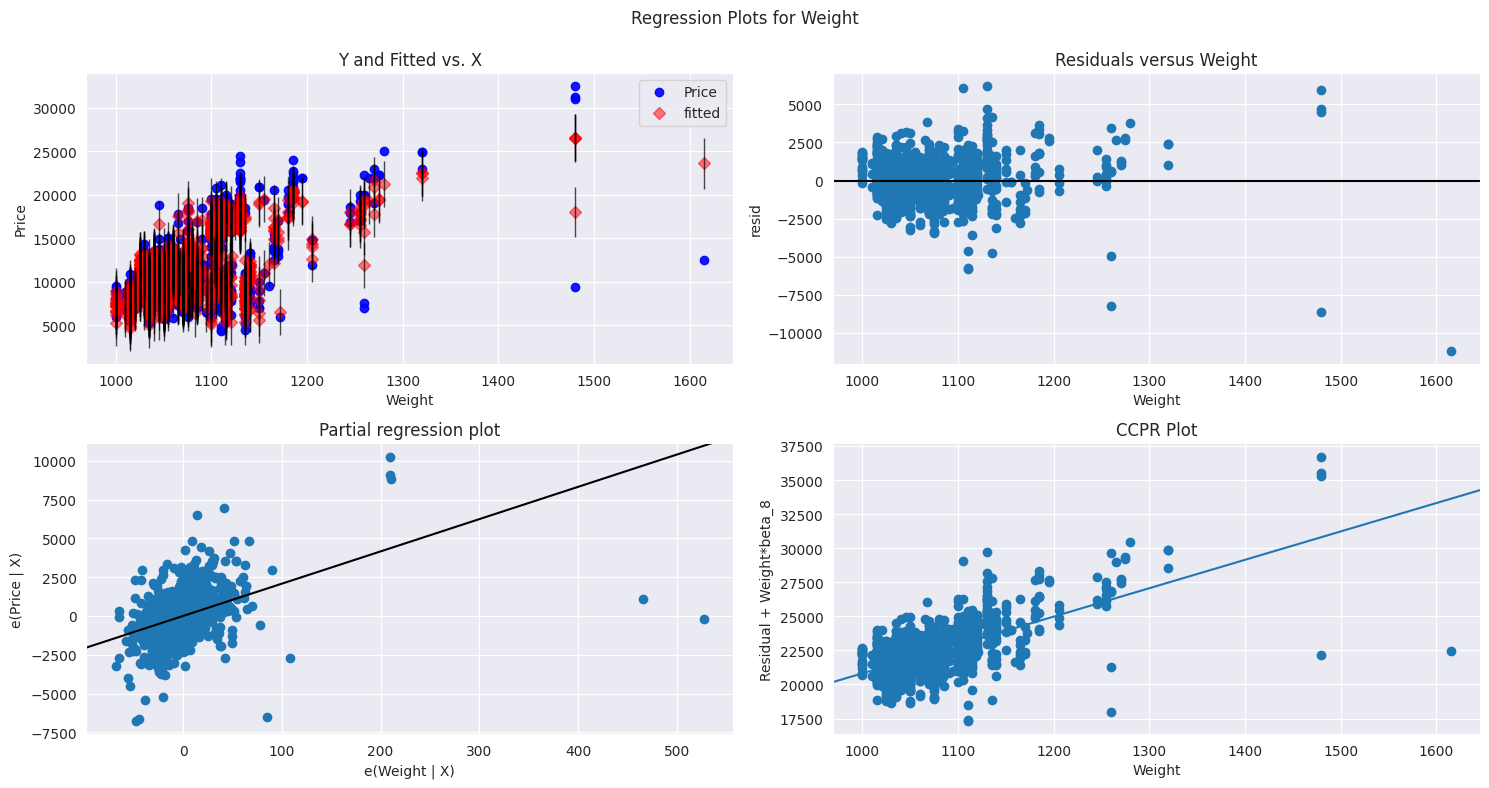

In [151]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

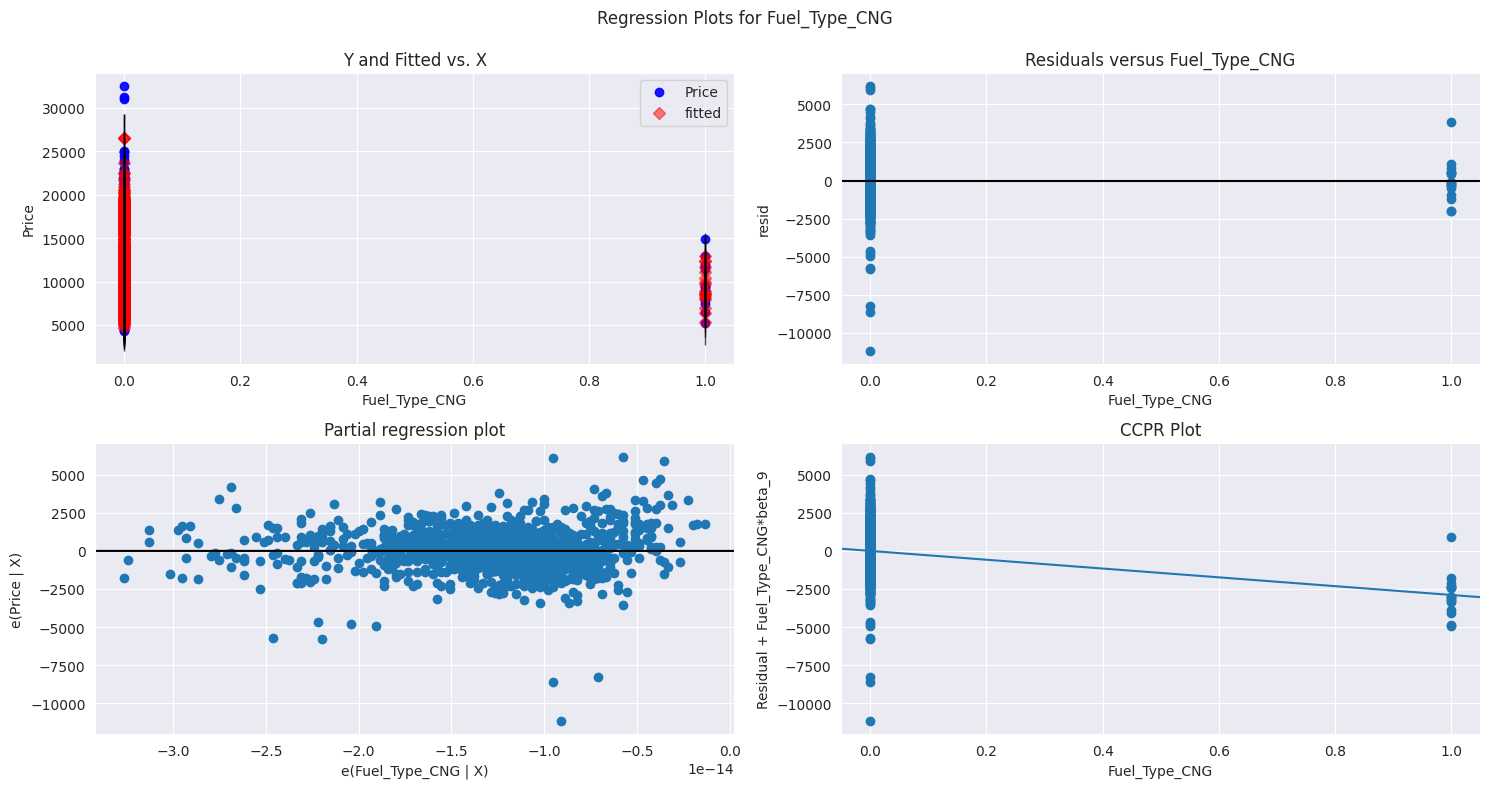

In [152]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Fuel_Type_CNG',fig=fig)
plt.show()

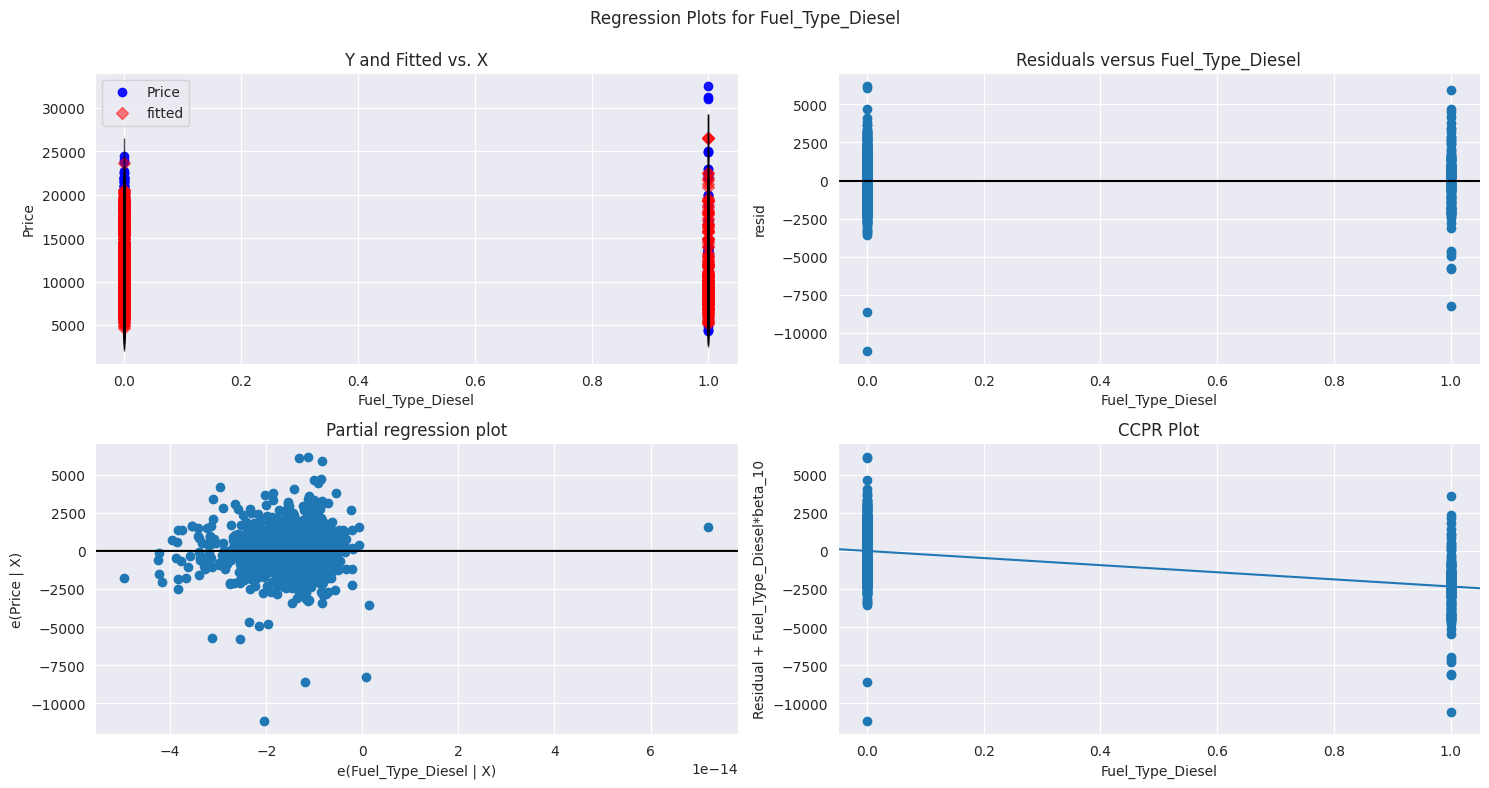

In [153]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Fuel_Type_Diesel',fig=fig)
plt.show()

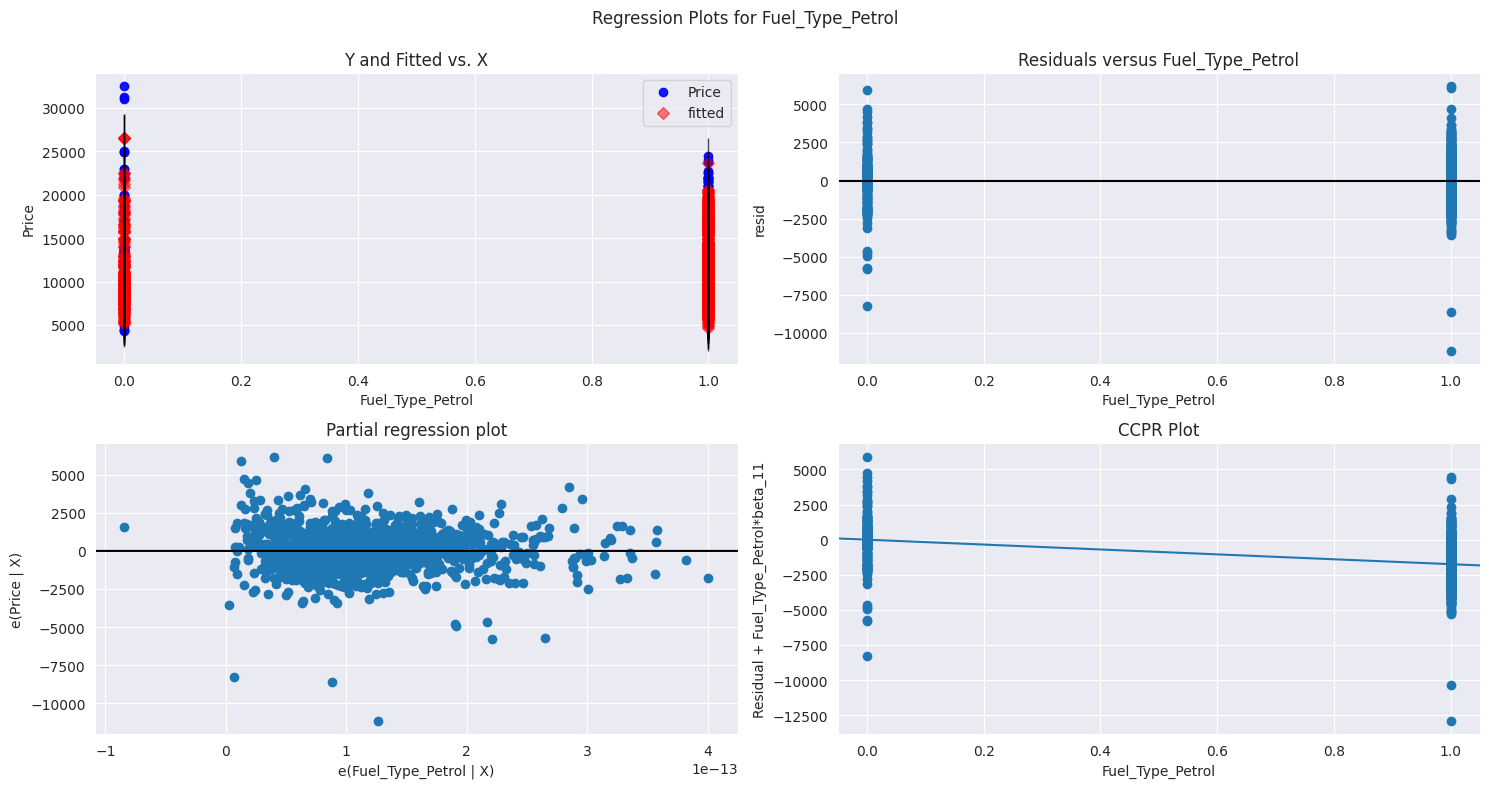

In [154]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Fuel_Type_Petrol',fig=fig)
plt.show()

# **RIDGE LASSO REGRESSION**

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
toyota

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [15]:
# input variables
X = toyota.iloc[:, :-1]
#output
Y = toyota.iloc[:, -1]
toyota.shape

(1436, 12)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)   #AS TESTING IS 20%
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)                 #TRAINING IS 80%

((1148, 11), (1148,), (288, 11), (288,))

In [18]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their corrsponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean squared Error on test set :  6.774925082413076e-29
             Columns  Coefficient Estimate
0              Price         -1.042443e-18
1                Age         -1.868518e-16
2                 KM         -2.259725e-19
3                 HP          4.237574e-17
4          Automatic          1.884579e-16
5                 CC          8.069652e-19
6              Doors          2.845126e-16
7              Gears          3.834588e-16
8             Weight          5.666179e-18
9      Fuel_Type_CNG         -1.000000e+00
10  Fuel_Type_Diesel         -1.000000e+00


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

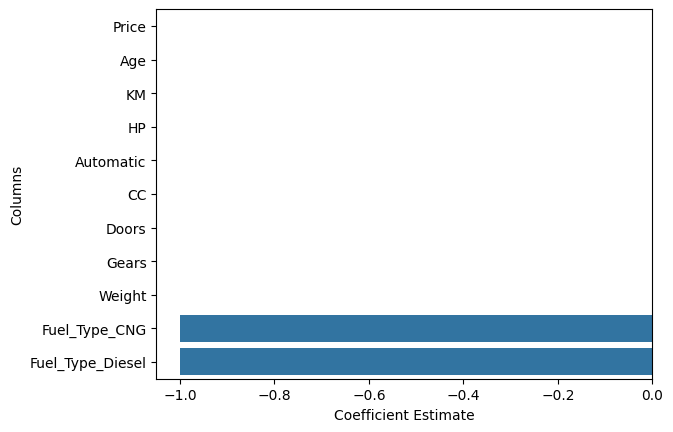

In [19]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient,orient='h')

In [22]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 0.80)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

6.759505837453783e-05
             Columns  Coefficient Estimate
0              Price          7.414900e-07
1                Age          1.380373e-04
2                 KM         -1.090797e-07
3                 HP          2.619320e-04
4          Automatic          4.041572e-03
5                 CC         -2.195904e-06
6              Doors          1.448888e-03
7              Gears          4.740635e-03
8             Weight         -1.388070e-04
9      Fuel_Type_CNG         -9.324566e-01
10  Fuel_Type_Diesel         -9.648904e-01


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

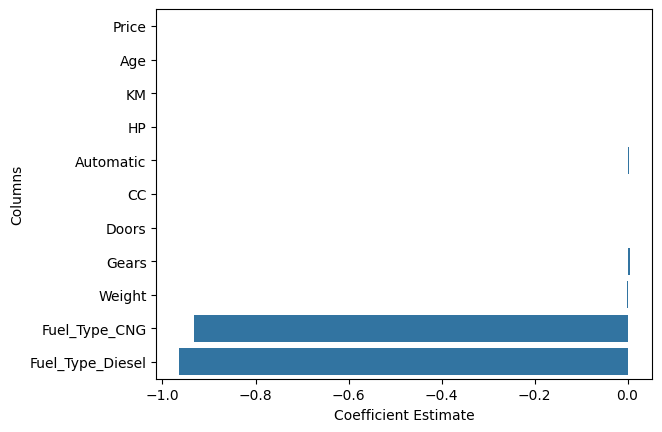

In [23]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

# **LASSO REGRESSION**

Mean squared error on test set 0.030113643096044116
             Columns  Coefficient Estimate
0              Price              0.000003
1                Age              0.000466
2                 KM             -0.000003
3                 HP              0.008465
4          Automatic              0.000000
5                 CC             -0.000068
6              Doors              0.000000
7              Gears              0.000000
8             Weight             -0.003369
9      Fuel_Type_CNG             -0.000000
10  Fuel_Type_Diesel             -0.000000


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

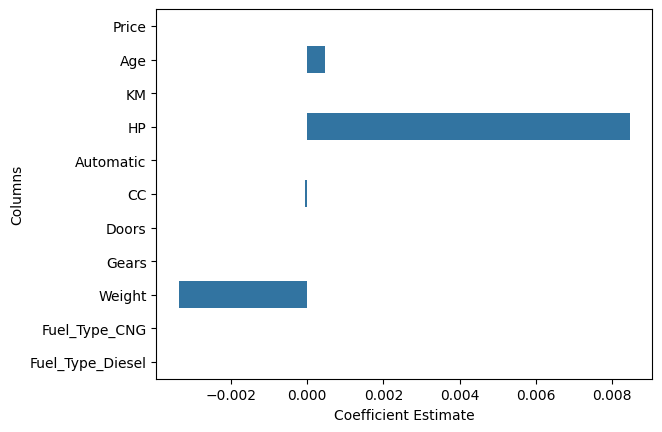

In [24]:
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 0.20)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)

lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)